###### Lab6 testbench
Run this cell before running any other cells

In [2]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD

import time
import numpy as np

LOG.propagate = False

In [3]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-03-14 11:12:44,633 | INFO     |: info
2025-03-14 11:12:44,634 | WARNING  |: warning
2025-03-14 11:12:44,635 | ERROR    |: error
2025-03-14 11:12:44,635 | CRITICAL |: critical


In [4]:
ble.send_command(CMD.PID_ORIEN_CONTROL, "20|5|0.005|100|50")  

NameError: name 'ble' is not defined

In [4]:
ble = get_ble_controller()
ble.connect()

2025-03-14 11:12:45,983 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:c3:e4:25:23:51
2025-03-14 11:12:50,339 | INFO     |: Connected to c0:c3:e4:25:23:51


C:\Users\Administrator\Documents\ECE4160\IvannnHuang.github.io\Lab6\pid_orien_python\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [83]:
import re

sensor_data_index = 0
sensor_data = [[0.0 for _ in range(7)] for _ in range(2500)]

msg = None

def data_collect(uuid, byte_array):
    global sensor_data_index
    msg = ble.bytearray_to_string(byte_array)
    data = re.findall(r'-?\d+\.\d+', msg)
    sensor_data[sensor_data_index] = [float(num) for num in data]
    sensor_data_index += 1

ble.start_notify(ble.uuid['RX_STRING'], data_collect)


In [84]:
ble.send_command(CMD.PID_ORIEN_CONTROL, "20|10|0.1|0|0")  

In [85]:
ble.send_command(CMD.STOP, "")

2025-03-14 11:20:01,040 | INFO     |: Disconnected from C0:C3:E4:25:23:51


In [79]:
print(sensor_data_index)

2500


In [80]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(sensor_data)
time = data[:sensor_data_index, 0]
angle = data[:sensor_data_index, 1]
speed = data[:sensor_data_index, 2]
err = data[:sensor_data_index, 3]
kp = data[:sensor_data_index, 4]
ki = data[:sensor_data_index, 5]
kd = data[:sensor_data_index, 6]

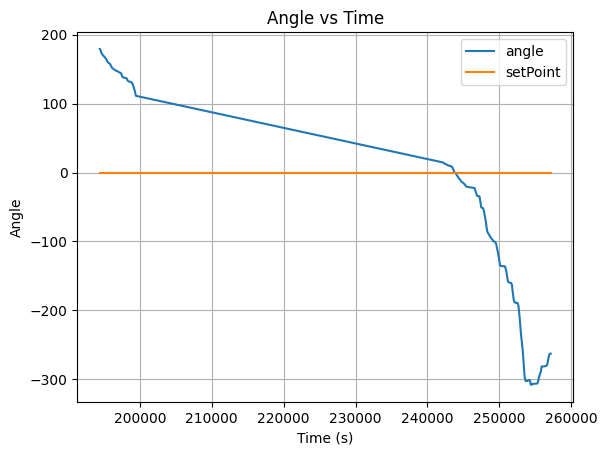

In [81]:
plt.figure()
plt.plot(time, angle, label='angle')
plt.plot([time[:1], time[sensor_data_index-1:sensor_data_index]], [0, 0], label='setPoint')
plt.title('Angle vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle')
plt.legend()
plt.grid()
plt.show()

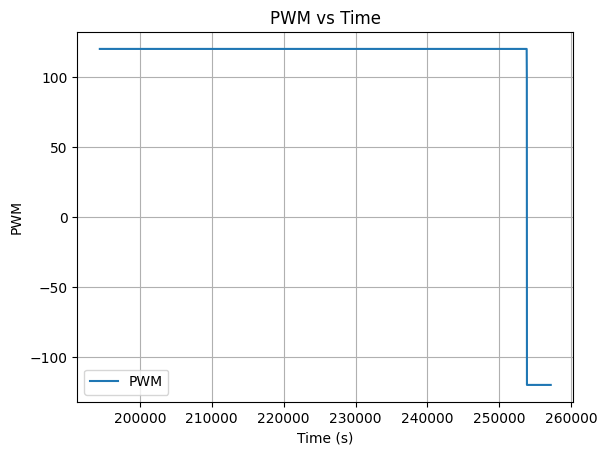

In [82]:
plt.figure()
plt.plot(time, speed, label='PWM')
# plt.plot([time[:1], time[sensor_data_index-1:sensor_data_index]], [0, 0], label='setPoint')
plt.title('PWM vs Time')
plt.xlabel('Time (s)')
plt.ylabel('PWM')
plt.legend()
plt.grid()
plt.show()

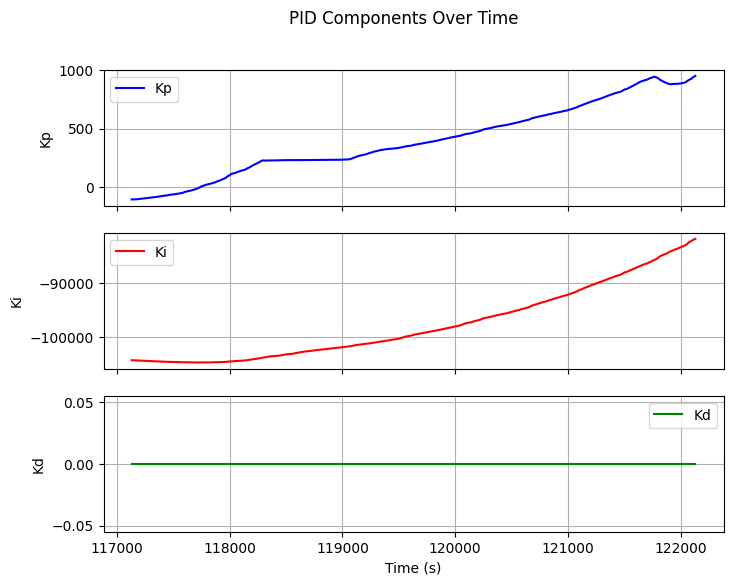

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)  # Create 3 subplots

axes[0].plot(time, kp, color='b', label='Kp')
axes[0].set_ylabel('Kp')
axes[0].legend()
axes[0].grid()

axes[1].plot(time, ki, color='r', label='Ki')
axes[1].set_ylabel('Ki')
axes[1].legend()
axes[1].grid()

axes[2].plot(time[:], kd[:], color='g', label='Kd')
axes[2].set_ylabel('Kd')
axes[2].set_xlabel('Time (s)')
axes[2].legend()
axes[2].grid()

plt.suptitle('PID Components Over Time')
plt.show()


In [298]:
ble.send_command(CMD.PID_ORIEN_CONTROL, "20|2|0.005|100|50")  
time.sleep(3)
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|25")  
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|0")  
time.sleep(3)
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|50")  
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|-50")  
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|-25") 
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|-125")  
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|2|0.005|100|25")     
time.sleep(3)
ble.send_command(CMD.STOP, "")

In [310]:
ble.send_command(CMD.PID_ORIEN_CONTROL, "20|5|0.005|100|50")  # +90
time.sleep(3)
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|25")  # +45
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|0")   # +0
time.sleep(3)
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|50")  # +90
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|-50") # -90
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|-25") # -45
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|-125")# -225  
time.sleep(3) 
ble.send_command(CMD.PID_ORIEN_CONTROL, "10|5|0.005|100|25")  # +45   
time.sleep(3)
ble.send_command(CMD.STOP, "")

2025-03-13 17:24:21,774 | INFO     |: Disconnected from C0:C3:E4:25:23:51


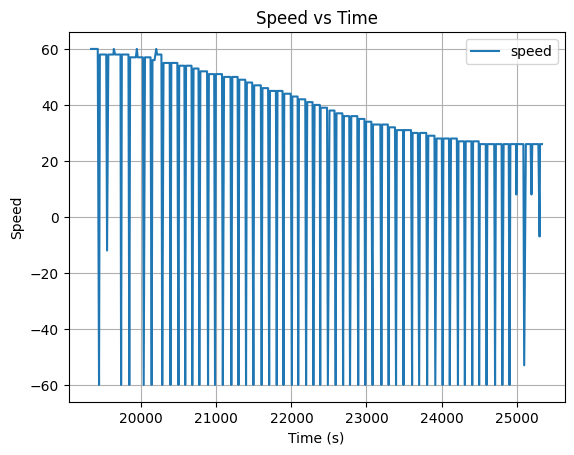

In [852]:
plt.figure()
plt.plot(time, speed, label='speed')
plt.title('Speed vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.legend()
plt.grid()
plt.show()


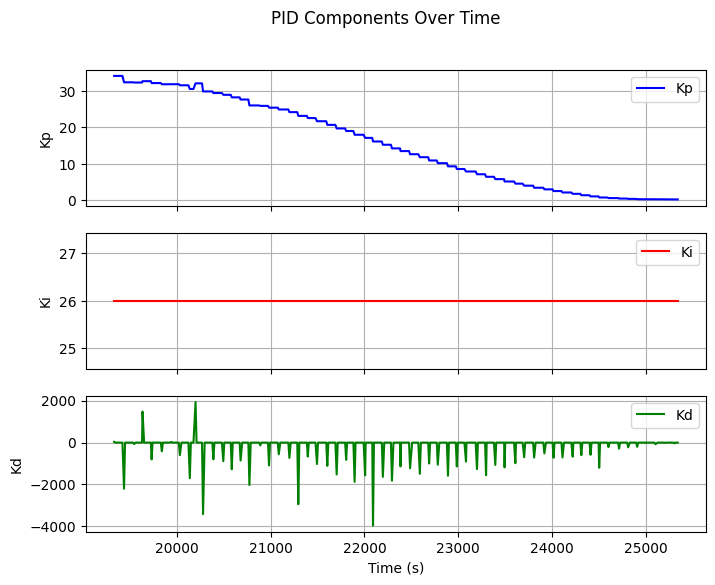

In [853]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)  # Create 3 subplots

axes[0].plot(time, kp, color='b', label='Kp')
axes[0].set_ylabel('Kp')
axes[0].legend()
axes[0].grid()

axes[1].plot(time, ki, color='r', label='Ki')
axes[1].set_ylabel('Ki')
axes[1].legend()
axes[1].grid()

axes[2].plot(time[:], kd[:], color='g', label='Kd')
axes[2].set_ylabel('Kd')
axes[2].set_xlabel('Time (s)')
axes[2].legend()
axes[2].grid()

plt.suptitle('PID Components Over Time')
plt.show()
